# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

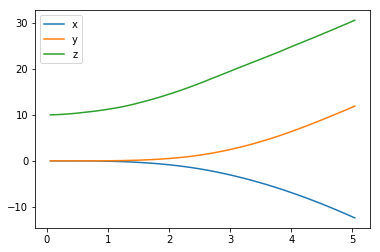

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

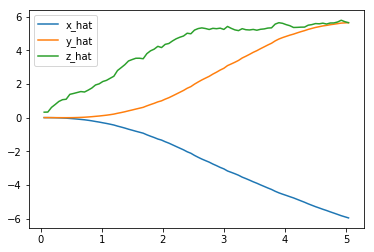

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

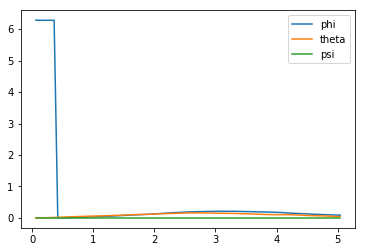

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

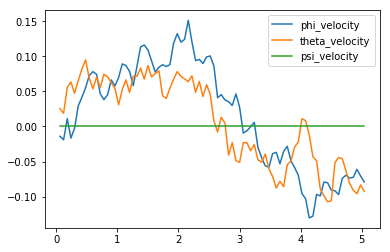

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

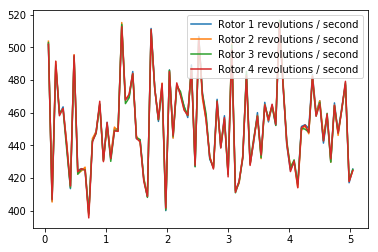

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.41396723  11.89309409  30.57764057   0.08669446   0.04012682   0.        ]
[-5.96143157  5.64182761  5.64045739]
[-0.07916277 -0.09240917  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.614 (best =  -0.057), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.]
import numpy as np
from agents.Agent import DDPG
from agents.Ornstein_Uhlenbeck_Noise import OUNoise 
from Quadcopter_Task import Take_Off as Task

number_of_episodes = 500
Target_Position = np.array([0., 0., 50.])
Take_Off = Task(target_pos = Target_Position)
Agent = DDPG(Take_Off)
Best_Score = -np.inf
Worst_Score = np.inf
Saved_States = np.zeros([18, number_of_episodes])
All_Scores = np.zeros(number_of_episodes)

Using TensorFlow backend.


In [11]:


    
for episode in range(1, number_of_episodes + 1):
    State = Agent.reset_episode()

    Score = 0

    while True: 
        Action = Agent.act(State)

        Next_State, Reward, Done = Take_Off.step(Action)
        Agent.step(Action, Reward, Next_State, Done)
        
        State = Next_State
        Score += Reward

        Best_Score = max(Best_Score, Score)
        Worst_Score = min(Worst_Score, Score)

        if Done: 
            break
            
    Saved_States[:, episode - 1] = State
    All_Scores[episode - 1] = Score

    if Done:
        print("\rEpisode = {:4d}, Score = {:7.3f} (Best = {:7.3f} , Worst = {:7.3f})".format(
           episode, Score, Best_Score, Worst_Score), end="")

        sys.stdout.flush()

Episode =  500, Score = 192.316 (Best = 199.463 , Worst =   2.419)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

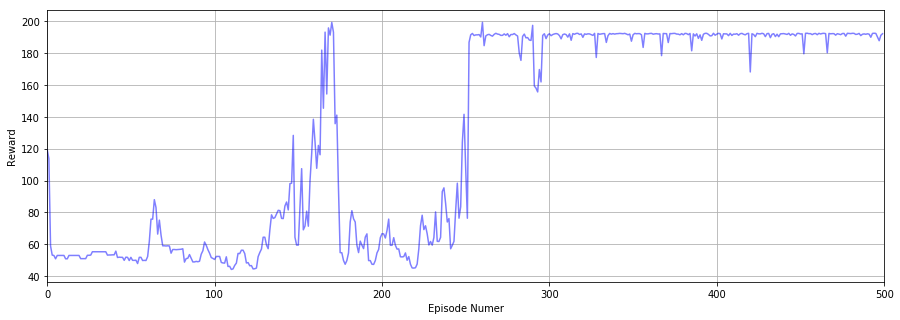

In [12]:
## TODO: Plot the rewards.
plt.figure(figsize = (15, 5))
plt.plot(All_Scores, alpha = 0.5, color = 'blue')

plt.xlim(0, len(All_Scores))
plt.xlabel('Episode Numer')

plt.ylabel('Reward')

plt.grid(True)
plt.show()

 

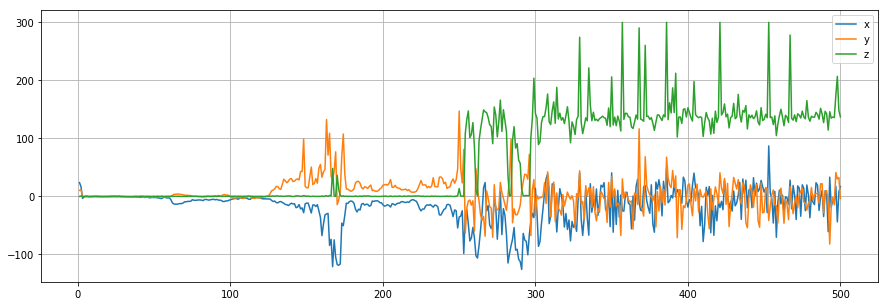

In [13]:
labels = ['x', 'y', 'z']
plt.figure(figsize = (15, 5))

#plt.plot(All_Scores, Saved_States[1, :], label = labels[0])
#plt.plot(All_Scores, Saved_States[2, :], label = labels[1])
plt.plot(list(range(1, number_of_episodes + 1)) , Saved_States[0, :], label = labels[0])
plt.plot(list(range(1, number_of_episodes + 1)) , Saved_States[1, :], label = labels[1])
plt.plot(list(range(1, number_of_episodes + 1)) , Saved_States[2, :], label = labels[2])
plt.legend()
plt.grid(True)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I chose was to simulate a quadcopter taking off from the ground to a target position of [0., 0., 50.] in the X, Y, and Z-axis respectively. My goal with the reward function was to incorporate a lot of the physics that goes into developing the quadcopter simulation. To be more specific, I wanted to reward the actor for moving in the positive Z direction towards the targeted position of 50 meters. To do this I applied the following logic in my 'Quadcopter_Task.py' file: 

            # We need to reward the agent for achieving the desired target
            if (self.sim.pose[2] >= self.start_pos[2]) and (self.sim.pose[2] <= self.target_pos[2]):
                Reward += 0.1 
                
I added some additional logic to reward the actor for producing positive reward results and finishing the task and vice versa penalizing it if it produced a negative result. My goal for this was to encoruage the actor to constantly produce a positive reward, but I made the reward for this very small as I didn't want it to be the defining factor in teaching the actor. 
            
            # If the agent produces a negative results; otherwise, it should be penalized. 
            if Done is True and Reward > 0:
                Reward += 0.01
            elif Done is True and Reward <= 0: 
                Reward -= 0.01

Lastly, I adjusted the 'get_reward()' function inside of the task to penalize the actor for having a large position error with respect to the targeted position. However, I did want to reward it slightly for producing a position error that was within some margin of the position. The idea was to not discourage its efforts for never getting close to the target position. My thought was if it can get 'close enough' then it should be rewarded and it might get closer and closer to the target position over time. The logic for this was the following: 

        Position_Error = np.linalg.norm((self.sim.pose[:3] - self.target_pos), axis = 0)
        Error_Percentage = Position_Error/100
        
        if Error_Percentage <= self.Margin: 
            Penalty = -Penatly_Ratio * Position_Error
        else: 
            Penalty =  Penatly_Ratio * Position_Error

        Reward = np.tanh((1 - Penalty))
        
By adding a negative to the penalty for the actor getting with a margined position of the target position it was be added to the 'tanh' reward function and increase the reward value. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I used the suggested Deep Deterministic Policy Gradient (DDPG) algorithim. I connected the algorithm to my Actor and Critic where I used 2 Dense hidden lyaers of size 300-400 for the Actor alongside a batch normilization and the ReLU activation function. With regards to the output laer for the Actor I used another dense layer with a sigmoid function and then scaled the results using a lamda layer. I attempted to use 3 dense hidden layers and the tanh function for the output layer, but I wasn't really getting 'better' results by increasing the fidelity of the model. 

As for as the Critic goes I reduced how many layers were used in the actor layers. The goal here was to allow the actor to produce better results from the Critic to allow it to learn more quickly. I still used 2 dense layers for the states and 1 dense layer for the actions, but I didn't include as many batch normilization and activation layers. Also, I used the Adam optimizer for both the Actor and Critic, but I used different learning rates for each to encourage some differences to help the actor to learn. 

For the hyperparameters I used the recommended ones provided, but I did attempt to lower the gamma parameter to help the actor learn, but I was running into some issue of inconsistency and decided to leave it alone for now. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: The agent learned somewhat smoothly overtime and then had an 'aha' moment towards the end. It looks like my reward function to reward the agent to move primarly in the Z direction worked, but it didn't quite get to the target position. However, what I did notice is that it did reach a steady state eventually and was begining to 'hover' at what it thought was the target position. I thought that this was encouraging for future development because I think with some finer tooning I could get the agent to get to the right target height. Also, looking at the position plot the position in the X and Y direction do 'hover' around zero which is also very encouraging since the target position has a X and Y position of zero. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I think the hardest part was specifying the task more specifically that reward function. It is tough to encourage the agent to find the right target position and I noticed that the more I changed the reward function the larger the differences in performance. It seems that having a higher reward doesn't necessarily correlate to the correct position and so a lot more tuning is needed, but I think overall I am satisfied with the work! 